In [15]:
import string
import random
import numpy as np
import time
import matplotlib.pyplot as plt

In [13]:
def poissonlength_words(lam_word): #generating words, length chosen from a Poisson distrib
    return ''.join([random.choice(string.ascii_lowercase) for _ in range(np.random.poisson(lam_word))])

In [16]:
lam_word=5
lam_sentence=1000
number_of_sentences = 10000

sentences = [' '.join([poissonlength_words(lam_word) for _ in range(np.random.poisson(lam_sentence))])
             for x in range(number_of_sentences)]

In [17]:
def bigramgen(n,m):
    return ''.join([random.choice(string.ascii_lowercase) for _ in range(n)])+' '+\
           ''.join([random.choice(string.ascii_lowercase) for _ in range(m)])

In [18]:
number_of_bigrams_we_search_for = [10,30,50,100,300,500,1000,3000,5000,10000]

In [21]:
logtime=[]
for number_of_bigrams in number_of_bigrams_we_search_for:
    
    print(number_of_bigrams)
    
    bigrams = [bigramgen(2,1) for _ in range(number_of_bigrams)]
    
    start_time=time.time()
    
    worddict={word:set() for sentence in sentences for word in sentence.split(' ')}

    for sentencei, sentence in enumerate(sentences):
        for wordi, word in enumerate(sentence.split(' ')):
            worddict[word].add(sentencei)

    for bigram in bigrams:
        reslist=[]
        setlist = [worddict[gram] for gram in bigram.split(' ')]
        intersection = set.intersection(*setlist)
        for candidate in intersection:
            if bigram in sentences[candidate]:
                reslist.append([bigram, candidate])

    end_time=time.time()
    
    logtime.append(end_time-start_time)

10
30
50
100
300
500
1000
3000
5000
10000


In [26]:
bruteforcetime=[]
for number_of_bigrams in number_of_bigrams_we_search_for:
    print(number_of_bigrams)
    bigrams = [bigramgen(2,1) for _ in range(number_of_bigrams)]
    start = time.time()
    for bigram in bigrams:
        #the core of the brute force method starts here
        reslist=[]
        for sentencei, sentence in enumerate(sentences):
            if ' '+bigram+' ' in sentence:
                reslist.append([bigram,sentencei])
        #and ends here
    end = time.time()
    bruteforcetime.append(end-start)

10
30
50
100
300
500
1000
3000
5000
10000


Text(0, 0.5, 'Time elapsed (sec)')

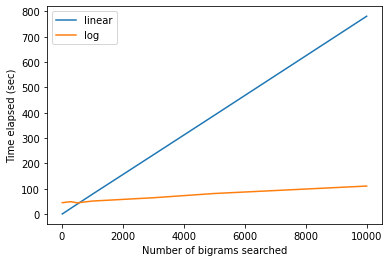

In [27]:
plt.plot(number_of_bigrams_we_search_for, bruteforcetime,label='linear')
plt.plot(number_of_bigrams_we_search_for, logtime,label='log')
plt.legend()
plt.xlabel('Number of bigrams searched')
plt.ylabel('Time elapsed (sec)')

Text(0, 0.5, 'Time elapsed (sec)')

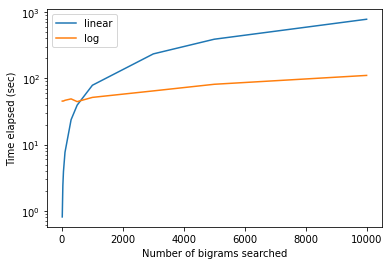

In [28]:
plt.plot(number_of_bigrams_we_search_for, bruteforcetime,label='linear')
plt.plot(number_of_bigrams_we_search_for, logtime,label='log')
plt.yscale('log')
plt.legend()
plt.xlabel('Number of bigrams searched')
plt.ylabel('Time elapsed (sec)')